In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\Dataset\\auto-mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
# convert horsepower column rom object to integer

In [14]:
df['horsepower'].dtypes

dtype('int64')

In [16]:
df['horsepower']=df['horsepower'].astype(int)

In [17]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [18]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [20]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower        1
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [19]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.0,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,94.0,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,0.0,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,94.0,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,94.0,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,94.0,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,94.0,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,94.0,5140.000000,24.800000,82.000000,3.000000


In [22]:
origin = df.pop('origin')

In [25]:
#Performing One-Hot Encoding 
df['USA'] = (origin == 1)*1.0
df['Europe'] = (origin == 2)*1.0
df['Japan'] = (origin == 3)*1.0

In [28]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Europe,Japan
0,18.0,8,307.0,94,3504,12.0,70,chevrolet chevelle malibu,1.0,0.0,0.0
1,15.0,8,350.0,94,3693,11.5,70,buick skylark 320,1.0,0.0,0.0
2,18.0,8,318.0,94,3436,11.0,70,plymouth satellite,1.0,0.0,0.0
3,16.0,8,304.0,94,3433,12.0,70,amc rebel sst,1.0,0.0,0.0
4,17.0,8,302.0,94,3449,10.5,70,ford torino,1.0,0.0,0.0


In [29]:
#Clearly, we do not require car name feature for modelling
df.pop('car name')

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object

In [31]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8,307.0,94,3504,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,94,3693,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,94,3436,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,94,3433,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,94,3449,10.5,70,1.0,0.0,0.0


<AxesSubplot:>

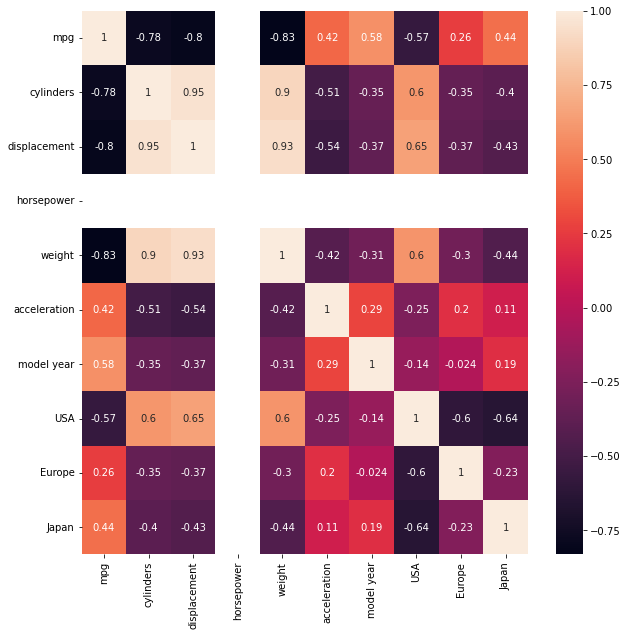

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

In [35]:
# Now standardize the features

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
scaler = StandardScaler()
df[['mpg','cylinders','displacement','weight','acceleration','model year']] = scaler.fit_transform(df[['mpg','cylinders','displacement','weight','acceleration','model year']])


In [38]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,-0.706439,1.498191,1.090604,94,0.630870,-1.295498,-1.627426,1.0,0.0,0.0
1,-1.090751,1.498191,1.503514,94,0.854333,-1.477038,-1.627426,1.0,0.0,0.0
2,-0.706439,1.498191,1.196232,94,0.550470,-1.658577,-1.627426,1.0,0.0,0.0
3,-0.962647,1.498191,1.061796,94,0.546923,-1.295498,-1.627426,1.0,0.0,0.0
4,-0.834543,1.498191,1.042591,94,0.565841,-1.840117,-1.627426,1.0,0.0,0.0


In [40]:
# Now splitting the data into train and test ### mpg means miles per gallon

In [43]:
x=df.drop(['mpg'],axis=1)
y=df['mpg']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [46]:
# Implementing regression models

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [50]:
lr=LinearRegression()
lr_model=lr.fit(x_train,y_train)

In [51]:
y_lrpred=lr_model.predict(x_test)

In [52]:
y_lrpred

array([ 1.12499185,  0.74984011, -0.31635757, -0.84516834, -1.42536897,
        0.40622787,  0.53152956, -1.6807098 , -0.88275678, -0.22516362,
       -1.32336939,  1.56932116,  0.16589768, -1.27282318, -0.01388826,
       -2.22166958,  0.73872781,  0.18135752, -0.85356176,  1.60830541,
        0.14075717, -0.64511635,  0.70496674,  0.63597064, -1.12407486,
        1.63142554,  0.38649333,  0.12979208, -0.20154083, -1.9058474 ,
        0.58871065,  1.63425445, -0.34309333,  0.25753444,  1.31591825,
       -1.36489558, -0.10402899, -0.17432454, -1.45622911,  0.55407217,
        0.34772395,  0.63402065, -0.31544288, -2.01830733,  0.04166071,
        1.44205081,  0.52682906,  0.23684089,  0.00754564,  0.63989888,
       -0.1764674 ,  1.22972839,  1.1177026 , -1.55753835,  0.53405556,
       -1.72135053, -0.43237128,  0.75634487, -0.09968441, -0.44499426,
       -0.87315526,  1.01921497,  0.00222749, -0.27696832, -0.38120014,
        0.17195313,  0.15584558,  1.09909152,  0.548895  , -1.43

In [54]:
r2_score(y_test, y_lrpred)

0.8443205478824631

In [55]:
pd.DataFrame(list(zip(y_test, y_lrpred)), columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,1.215121,1.124992
1,0.574601,0.749840
2,-0.578335,-0.316358
3,-1.346959,-0.845168
4,-1.218855,-1.425369
...,...,...
75,-0.463041,-0.179658
76,-0.770491,-0.408599
77,0.574601,0.767614
78,0.702705,0.867203


In [62]:
# NEURAL NETWORK MODEL

In [63]:
import tensorflow as tf

In [66]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 64, activation = tf.nn.relu, input_shape = [x_train.shape[1]]),tf.keras.layers.Dense(units = 64, activation = tf.nn.relu),tf.keras.layers.Dense(units = 1)])

In [67]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001), metrics = ['mae','mse'])

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(x_train, y_train, epochs = 500, validation_data=(x_test, y_test))

Epoch 1/500
10/10 [==============================] - 5s 53ms/step - loss: 4.6822 - mae: 1.4828 - mse: 4.6822 - val_loss: 1.1201 - val_mae: 0.9317 - val_mse: 1.1201
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 2.2008 - mae: 1.2453 - mse: 2.2008 - val_loss: 2.7326 - val_mae: 1.5139 - val_mse: 2.7326
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 1.3819 - mae: 0.9588 - mse: 1.3819 - val_loss: 0.8367 - val_mae: 0.8153 - val_mse: 0.8367
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 2.4457 - mae: 1.3593 - mse: 2.4457 - val_loss: 0.7577 - val_mae: 0.7776 - val_mse: 0.7577
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 1.4152 - mae: 1.0177 - mse: 1.4152 - val_loss: 1.9134 - val_mae: 1.2854 - val_mse: 1.9134
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8758 - mae: 1.2423 - mse: 1.8758 - val_loss: 1.1345 - val_mae: 0.9542 - val_mse: 1.1345
Epoch 7/500
10/10 [==

In [70]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
495,0.135216,0.279224,0.135216,0.115653,0.280779,0.115653
496,0.130365,0.267620,0.130365,0.098896,0.222416,0.098896
497,0.116724,0.257748,0.116724,0.089949,0.229320,0.089949
498,0.127152,0.268818,0.127152,0.111747,0.233734,0.111747
499,0.125231,0.254624,0.125231,0.102394,0.247626,0.102394


In [71]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 5ms/step


In [72]:
pd.DataFrame(list(zip(y_test,y_pred)), columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,1.215121,[1.0386367]
1,0.574601,[0.71850836]
2,-0.578335,[-0.46958107]
3,-1.346959,[-1.0932994]
4,-1.218855,[-1.2754192]
...,...,...
75,-0.463041,[-0.5536087]
76,-0.770491,[-0.8065286]
77,0.574601,[0.7406104]
78,0.702705,[0.55401266]


In [73]:
r2_score(y_test, y_pred)

0.8839521916751792

In [74]:
loss, mae, mse = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1024 - mae: 0.2476 - mse: 0.1024


In [76]:
##########################################################################################